In [6]:
#https://www.datascience.com/learn-data-science/tutorials/creating-data-visualizations-matplotlib-data-science-python
# Download data, unzip, etc.
import pandas as pd
import urllib
import tempfile
import shutil

daily_data = pd.read_csv('day.csv')
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])
drop_list = ['instant', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum']
daily_data.drop(drop_list, inplace = True, axis = 1)
daily_data.head()

,dteday,weekday,temp,windspeed,casual,registered,cnt
0,2011-01-01,6,0.344167,0.160446,331,654,985
1,2011-01-02,0,0.363478,0.248539,131,670,801
2,2011-01-03,1,0.196364,0.248309,120,1229,1349
3,2011-01-04,2,0.200000,0.160296,108,1454,1562
4,2011-01-05,3,0.226957,0.186900,82,1518,1600


In [8]:
#import matplotlib
from __future__ import division, print_function
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# In a notebook environment, display the plots inline
%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

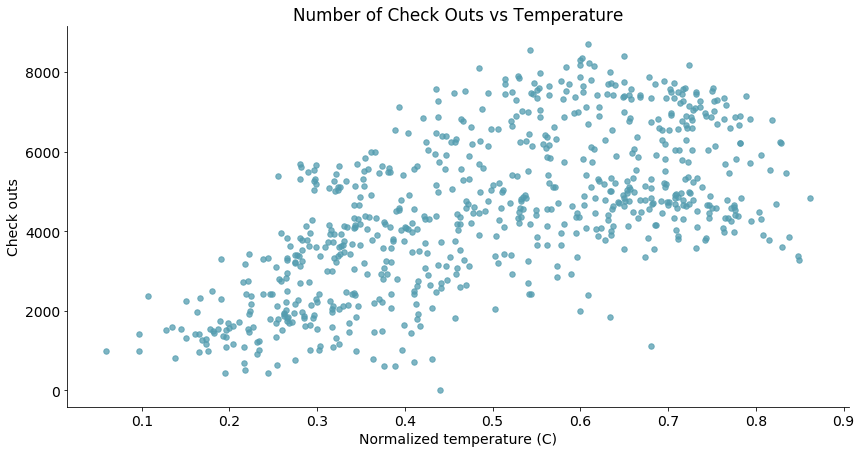

In [9]:
# Define a function to create the scatterplot. This makes it easy to
# reuse code within and across notebooks
def scatterplot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Call the function to create plot
scatterplot(x_data = daily_data['temp']
            , y_data = daily_data['cnt']
            , x_label = 'Normalized temperature (C)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs Temperature')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


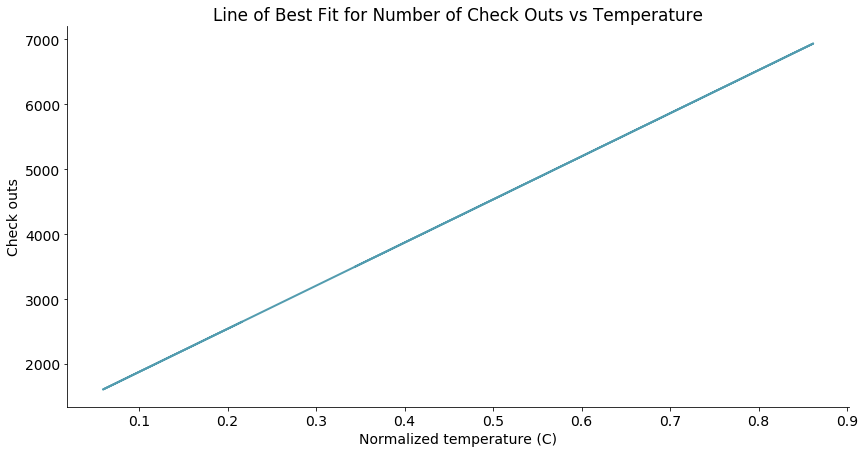

In [10]:
# Perform linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(daily_data['temp'])
y = daily_data['cnt']
regr = sm.OLS(y, x)
res = regr.fit()
# Get fitted values from model to plot
st, data, ss2 = summary_table(res, alpha=0.05)
fitted_values = data[:,2]

# Define a function for the line plot
def lineplot(x_data, y_data, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Call the function to create plot
lineplot(x_data = daily_data['temp']
         , y_data = fitted_values
         , x_label = 'Normalized temperature (C)'
         , y_label = 'Check outs'
         , title = 'Line of Best Fit for Number of Check Outs vs Temperature')

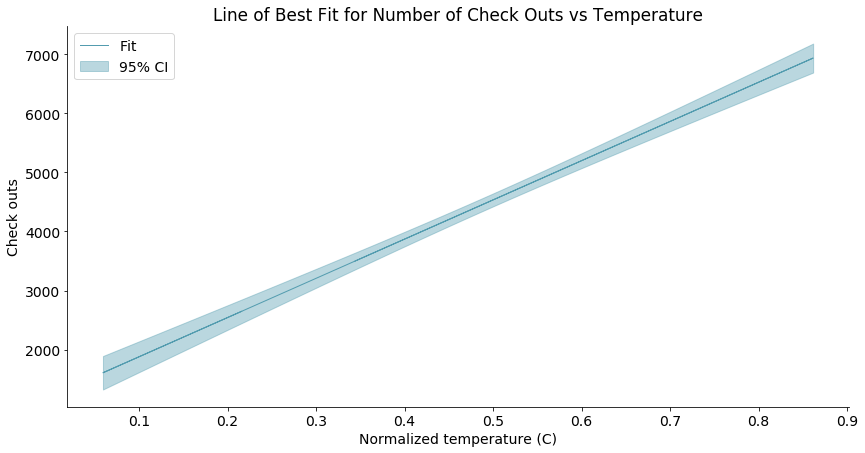

In [11]:
# Get the confidence intervals of the model
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# Data for regions where we want to shade to indicate the intervals has
# to be sorted by the x axis to display correctly
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = daily_data['temp']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True)

# Define a function for the line plot with intervals
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # Shade the confidence interval
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # Display legend
    ax.legend(loc = 'best')

# Call the function to create plot
lineplotCI(x_data = daily_data['temp']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI']
           , x_label = 'Normalized temperature (C)'
           , y_label = 'Check outs'
           , title = 'Line of Best Fit for Number of Check Outs vs Temperature')


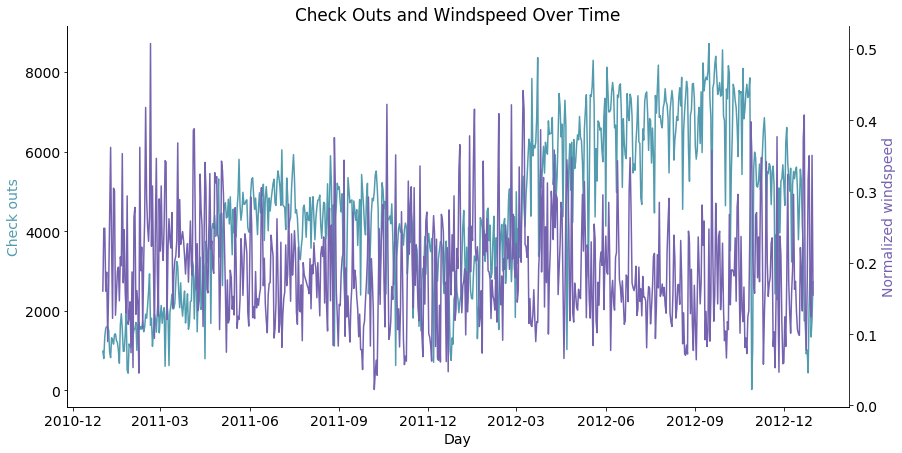

In [12]:
# Define a function for a plot with two y axes
def lineplot2y(x_data, x_label, y1_data, y1_color, y1_label, y2_data, y2_color, y2_label, title):
    # Each variable will actually have its own plot object but they
    # will be displayed in just one plot
    # Create the first plot object and draw the line
    _, ax1 = plt.subplots()
    ax1.plot(x_data, y1_data, color = y1_color)
    # Label axes
    ax1.set_ylabel(y1_label, color = y1_color)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)

    # Create the second plot object, telling matplotlib that the two
    # objects have the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data, color = y2_color)
    ax2.set_ylabel(y2_label, color = y2_color)
    # Show right frame line
    ax2.spines['right'].set_visible(True)

# Call the function to create plot
lineplot2y(x_data = daily_data['dteday']
           , x_label = 'Day'
           , y1_data = daily_data['cnt']
           , y1_color = '#539caf'
           , y1_label = 'Check outs'
           , y2_data = daily_data['windspeed']
           , y2_color = '#7663b0'
           , y2_label = 'Normalized windspeed'
           , title = 'Check Outs and Windspeed Over Time')

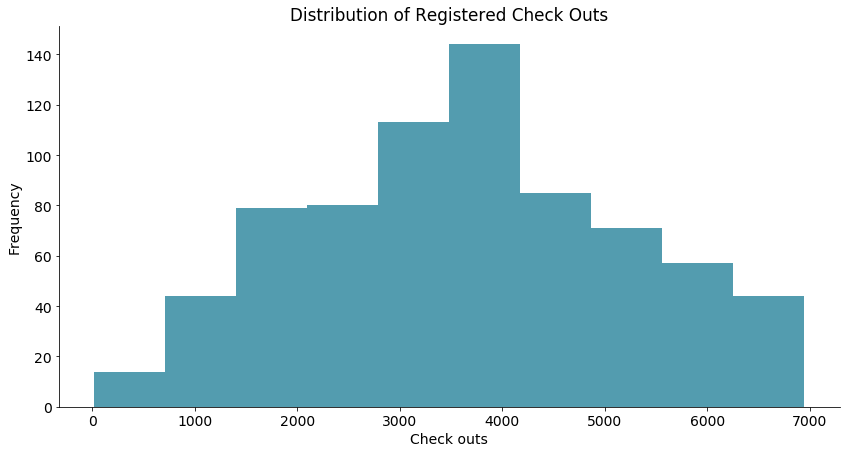

In [13]:
# Define a function for a histogram
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Call the function to create plot
histogram(data = daily_data['registered']
           , x_label = 'Check outs'
           , y_label = 'Frequency'
           , title = 'Distribution of Registered Check Outs')